In [6]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




In [7]:
#reading data and preview
data = pd.read_csv("cleaned_data.csv")
city_weather = pd.read_csv("city_weather.csv")
del city_weather["Unnamed: 0"]
city_weather.head(7)

,City,Latitude,Longitude,JAstrt,JAend,FEstrt,FEend,MRstrt,MRend,APstrt,APend,MYstrt,MYend
0,Brasilia,-10.90,-37.55,91.48,88.04,89.99,92.90,90.81,81.07,87.49,92.52,86.00,86.43
1,Chengdu,30.68,104.06,44.89,47.61,54.19,52.94,48.59,69.13,62.66,81.41,76.00,83.97
2,Kunshan,31.39,120.95,39.90,41.95,40.18,51.35,51.80,59.39,68.08,62.72,74.99,80.47
3,Penang,-7.81,113.99,88.70,89.01,88.04,92.13,88.33,89.84,87.67,85.57,86.32,91.94
4,Mumbai,19.01,72.85,87.07,83.56,81.52,83.60,84.12,86.96,87.42,91.25,90.23,91.17
5,Suzhou,31.30,120.58,42.78,45.18,44.57,54.12,53.21,61.70,66.42,70.44,76.11,81.00
6,Taoyuan,24.99,121.30,63.69,80.75,58.05,67.52,73.62,71.69,61.58,89.14,68.62,90.42


In [8]:
data.groupby(["FACTORY","SUPPLIER"]).sum()

LR  CONSUMPTION  VID  CND  PID
FACTORY  SUPPLIER                                
Brasilia A          0         2562    0    0    0
         B         57       176734   40    7   10
         C          4        70284    0    0    4
         E          3        71301    0    0    3
Chengdu  A         58      1207928    0   13   45
         C          8       231788    1    1    6
         D         72      1404672    1   38   33
         E         59      1090872    3   44   12
Kunshan  A          0      1706180    0    0    0
         C          0      1310713    0    0    0
         D          0       541213    0    0    0
         E          0      1841430    0    0    0
Mumbai   A          1         2734    1    0    0
         C          1         3642    0    0    1
Penang   A          0        15588    0    0    0
         C          0        39443    0    0    0
         D          0        22856    0    0    0
         E          0        75014    0    0    0
Suzhou   A          0       143286    0    0    0
         C          0        20558    0    0    0
         D          0            1    0    0    0
         E          0        69596    0    0    0
Taoyuan  C          0        11508    0    0    0
         E          4        82746    4    0    0

In [9]:
#Adding LRR per country
data_sum = data.groupby("FACTORY").sum()
data_sum["LRR(ppm)"] = data_sum["LR"]/data_sum["CONSUMPTION"]*1000000
data_sum

,LR,CONSUMPTION,VID,CND,PID,LRR(ppm)
FACTORY,,,,,,
Brasilia,64,320881,40,7,17,199.450887
Chengdu,197,3935260,5,96,96,50.060225
Kunshan,0,5399536,0,0,0,0.000000
Mumbai,2,6376,1,0,1,313.676286
Penang,0,152901,0,0,0,0.000000
Suzhou,0,233441,0,0,0,0.000000
Taoyuan,4,94254,4,0,0,42.438517


In [10]:
#Adding average change
#"City","Latitude","Longitude","JAstrt","JAend","JA▲", "FEstrt","FEend","FE▲","MRstrt","MRend","MR▲","APstrt","APend","AP▲","MYstrt","MYend","MY▲"
count = 0
for row in city_weather:
    count += 1
    
    if count > 3 and count%2 == 0:
        last = city_weather[row]
        
    elif count > 4 and count%2 ==1:
            
        col = row +str(count)
        city_weather[col] = (city_weather[row] + last)/2
    
        
city_weather
            

,City,Latitude,Longitude,JAstrt,JAend,FEstrt,FEend,MRstrt,MRend,APstrt,APend,MYstrt,MYend,JAend5,FEend7,MRend9,APend11,MYend13
0,Brasilia,-10.90,-37.55,91.48,88.04,89.99,92.90,90.81,81.07,87.49,92.52,86.00,86.43,89.760,91.445,85.940,90.005,86.215
1,Chengdu,30.68,104.06,44.89,47.61,54.19,52.94,48.59,69.13,62.66,81.41,76.00,83.97,46.250,53.565,58.860,72.035,79.985
2,Kunshan,31.39,120.95,39.90,41.95,40.18,51.35,51.80,59.39,68.08,62.72,74.99,80.47,40.925,45.765,55.595,65.400,77.730
3,Penang,-7.81,113.99,88.70,89.01,88.04,92.13,88.33,89.84,87.67,85.57,86.32,91.94,88.855,90.085,89.085,86.620,89.130
4,Mumbai,19.01,72.85,87.07,83.56,81.52,83.60,84.12,86.96,87.42,91.25,90.23,91.17,85.315,82.560,85.540,89.335,90.700
5,Suzhou,31.30,120.58,42.78,45.18,44.57,54.12,53.21,61.70,66.42,70.44,76.11,81.00,43.980,49.345,57.455,68.430,78.555
6,Taoyuan,24.99,121.30,63.69,80.75,58.05,67.52,73.62,71.69,61.58,89.14,68.62,90.42,72.220,62.785,72.655,75.360,79.520


In [11]:
#renaming columns to read easier
city_weather = city_weather.rename(columns = {"JAstrt":"Jan(strt)","JAend":"Jan(end)","JAend5":"Jan(AVG)", "FEstrt":"Feb(strt)",
                                              "FEend":"Feb(end)","FEend7":"Feb(AVG)","MRstrt":"Mar(strt)","MRend":"Mar(end)",
                                              "MRend9":"Mar(AVG)","APstrt":"Apr(strt)","APend":"Apr(end)","APend11":"Apr(AVG)",
                                              "MYstrt":"May(strt)","MYend":"May(end)","MYend13":"May(AVG)"})

#reorganizing columns to make more sense
city_weather = city_weather[["City","Latitude","Longitude","Jan(strt)","Jan(end)","Jan(AVG)","Feb(strt)","Feb(end)","Feb(AVG)",
                             "Mar(strt)","Mar(end)","Mar(AVG)","Apr(strt)","Apr(end)","Apr(AVG)","May(strt)","May(end)",
                             "May(AVG)"]]

city_weather


,City,Latitude,Longitude,Jan(strt),Jan(end),Jan(AVG),Feb(strt),Feb(end),Feb(AVG),Mar(strt),Mar(end),Mar(AVG),Apr(strt),Apr(end),Apr(AVG),May(strt),May(end),May(AVG)
0,Brasilia,-10.90,-37.55,91.48,88.04,89.760,89.99,92.90,91.445,90.81,81.07,85.940,87.49,92.52,90.005,86.00,86.43,86.215
1,Chengdu,30.68,104.06,44.89,47.61,46.250,54.19,52.94,53.565,48.59,69.13,58.860,62.66,81.41,72.035,76.00,83.97,79.985
2,Kunshan,31.39,120.95,39.90,41.95,40.925,40.18,51.35,45.765,51.80,59.39,55.595,68.08,62.72,65.400,74.99,80.47,77.730
3,Penang,-7.81,113.99,88.70,89.01,88.855,88.04,92.13,90.085,88.33,89.84,89.085,87.67,85.57,86.620,86.32,91.94,89.130
4,Mumbai,19.01,72.85,87.07,83.56,85.315,81.52,83.60,82.560,84.12,86.96,85.540,87.42,91.25,89.335,90.23,91.17,90.700
5,Suzhou,31.30,120.58,42.78,45.18,43.980,44.57,54.12,49.345,53.21,61.70,57.455,66.42,70.44,68.430,76.11,81.00,78.555
6,Taoyuan,24.99,121.30,63.69,80.75,72.220,58.05,67.52,62.785,73.62,71.69,72.655,61.58,89.14,75.360,68.62,90.42,79.520


In [12]:
city_weather.to_csv("city_weather_change.csv")


In [13]:
#reading factory and supplier df
LRR_factory = pd.read_csv("LRR_factory.csv")
LRR_supplier = pd.read_csv("LRR_supplier.csv")

LRR_factory.head()


,FACTORY,MONTH,CONSUMPTION,LR,VID,CND,PID,LRR (ppm)
0,Brasilia,AP,90967,16,10,1,5,175.887959
1,Brasilia,FE,51838,14,10,2,2,270.072148
2,Brasilia,JA,72846,13,7,2,4,178.458666
3,Brasilia,MR,80084,15,9,1,5,187.303332
4,Brasilia,MY,25146,6,4,1,1,238.606538


In [14]:
#getting data per supplier
LRR_supplier.head(10)
a_supplier = LRR_supplier[LRR_supplier["SUPPLIER"]=="A"]
a_supplier

,SUPPLIER,MONTH,CONSUMPTION,LR,VID,CND,PID,LRR (ppm)
0,A,AP,788622,10,0,4,6,12.680346
1,A,FE,392016,5,0,0,5,12.754581
2,A,JA,511955,16,1,2,13,31.252747
3,A,MR,742751,2,0,2,0,2.692692
4,A,MY,642934,26,0,5,21,40.439610


In [15]:
brasilia_weather = LRR_factory[LRR_factory["FACTORY"]=="Brasilia"]
brasilia_weather
LRR_factory.groupby("FACTORY").count()

,MONTH,CONSUMPTION,LR,VID,CND,PID,LRR (ppm)
FACTORY,,,,,,,
Brasilia,5,5,5,5,5,5,5
Chengdu,5,5,5,5,5,5,5
Kunshan,5,5,5,5,5,5,5
Mumbai,4,4,4,4,4,4,4
Penang,5,5,5,5,5,5,5
Suzhou,5,5,5,5,5,5,5
Taoyuan,5,5,5,5,5,5,5


In [16]:
brasilia_avg_temps = []
chengdu_avg_temps = []
kunshan_avg_temps = []
mumbai_avg_temps = []
penang_avg_temps = []
suzhou_avg_temps = []
taoyuan_avg_temps =[]

all_city_avg_temps = []
row_num = 6
count = 0 
for rows in city_weather:
    
    count += 1

    if count == row_num:
        x= 0
        brasilia_avg_temps.append(city_weather[rows][x])
        chengdu_avg_temps.append(city_weather[rows][x+1])
        kunshan_avg_temps.append(city_weather[rows][x+2])
        mumbai_avg_temps.append(city_weather[rows][x+3])
        penang_avg_temps.append(city_weather[rows][x+4])
        suzhou_avg_temps.append(city_weather[rows][x+5])
        taoyuan_avg_temps.append(city_weather[rows][x+6])
        
        row_num += 3
each = chengdu_avg_temps,kunshan_avg_temps
del mumbai_avg_temps[4]
all_city_avg_temps = (brasilia_avg_temps + chengdu_avg_temps + kunshan_avg_temps + mumbai_avg_temps +
                      penang_avg_temps + suzhou_avg_temps + taoyuan_avg_temps)
len(all_city_avg_temps)


34

In [20]:
LRR_factory["AVG TEMPS"] = all_city_avg_temps
LRR_factory.head()

,FACTORY,MONTH,CONSUMPTION,LR,VID,CND,PID,LRR (ppm),AVG TEMPS
0,Brasilia,AP,90967,16,10,1,5,175.887959,89.760
1,Brasilia,FE,51838,14,10,2,2,270.072148,91.445
2,Brasilia,JA,72846,13,7,2,4,178.458666,85.940
3,Brasilia,MR,80084,15,9,1,5,187.303332,90.005
4,Brasilia,MY,25146,6,4,1,1,238.606538,86.215


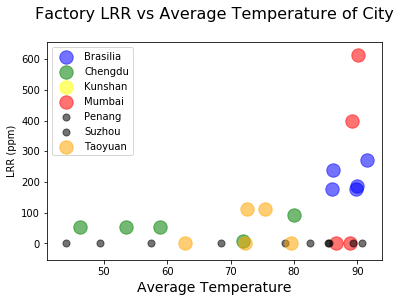

In [102]:
brasilia_weather = LRR_factory[LRR_factory["FACTORY"]=="Brasilia"]
brasilia_weather = brasilia_weather.copy()
brasilia_weather["AVG TEMPS"] = brasilia_avg_temps
brasilia_weather = brasilia_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

chengdu_weather = LRR_factory[LRR_factory["FACTORY"]=="Chengdu"]
chengdu_weather = chengdu_weather.copy()
chengdu_weather["AVG TEMPS"] = chengdu_avg_temps
chengdu_weather = chengdu_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

kunshan_weather =  LRR_factory[LRR_factory["FACTORY"]=="Kushan"]
kunshan_weather = kunshan_weather.copy()
kunshan_weather["AVG TEMPS"] = kunshan_avg_temps
kunshan_weather = kunshan_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

mumbai_weather =  LRR_factory[LRR_factory["FACTORY"]=="Mumbai"]
mumbai_weather = mumbai_weather.copy()
mumbai_weather["AVG TEMPS"] = mumbai_avg_temps
mumbai_weather = mumbai_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

penang_weather =  LRR_factory[LRR_factory["FACTORY"]=="Penang"]
penang_weather = penang_weather.copy()
penang_weather["AVG TEMPS"] = penang_avg_temps
penang_weather = penang_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

suzhou_weather =  LRR_factory[LRR_factory["FACTORY"]=="Suzhou"]
suzhou_weather = suzhou_weather.copy()
suzhou_weather["AVG TEMPS"] = suzhou_avg_temps
suzhou_weather = suzhou_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

taoyuan_weather =  LRR_factory[LRR_factory["FACTORY"]=="Taoyuan"]
taoyuan_weather = taoyuan_weather.copy()
taoyuan_weather["AVG TEMPS"] = taoyuan_avg_temps
taoyuan_weather = taoyuan_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

plt.scatter(brasilia_weather["AVG TEMPS"],brasilia_weather["LRR (ppm)"],alpha = .55, s = 180, c = "blue");
plt.scatter(chengdu_weather["AVG TEMPS"],chengdu_weather["LRR (ppm)"],alpha = .55, s = 180, c = "green");
plt.scatter(kunshan_weather["AVG TEMPS"],kunshan_weather["LRR (ppm)"],alpha = .55, s = 180, c = "yellow");
plt.scatter(mumbai_weather["AVG TEMPS"],mumbai_weather["LRR (ppm)"],alpha = .55, s = 180, c = "red");
plt.scatter(penang_weather["AVG TEMPS"],penang_weather["LRR (ppm)"],alpha = .55, s = 50, c = "black");
plt.scatter(suzhou_weather["AVG TEMPS"],suzhou_weather["LRR (ppm)"],alpha = .55, s = 50, c = "black")
plt.scatter(taoyuan_weather["AVG TEMPS"],taoyuan_weather["LRR (ppm)"],alpha = .55, s = 180, c = "orange");

plt.legend(LRR_factory["FACTORY"].unique());
plt.title("Factory LRR vs Average Temperature of City\n", fontsize = 16);
plt.xlabel("Average Temperature", fontsize = 14);
plt.ylabel("LRR (ppm)");

plt.savefig("AVGtempsVsFactoryLRR.png")

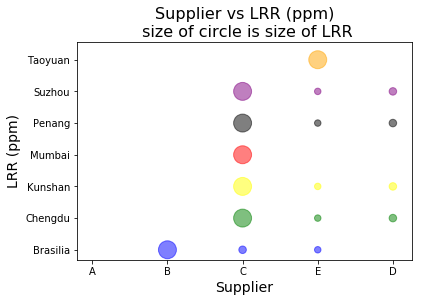

In [97]:
fac_supp_df = data.groupby(["FACTORY","SUPPLIER"])
sum_fac_supp = fac_supp_df.sum()
sum_fac_supp["LRR (ppm)"] = sum_fac_supp["LR"]/sum_fac_supp["CONSUMPTION"]*100000
sum_fac_supp = sum_fac_supp.reset_index()
size = sum_fac_supp["LRR (ppm)"]*10
plt.scatter((sum_fac_supp[sum_fac_supp["FACTORY"]=="Brasilia"]["SUPPLIER"]),
            (sum_fac_supp[sum_fac_supp["FACTORY"]=="Brasilia"]["FACTORY"]),c = "blue",s = size, alpha = .5);
plt.scatter((sum_fac_supp[sum_fac_supp["FACTORY"]=="Chengdu"]["SUPPLIER"]),
            (sum_fac_supp[sum_fac_supp["FACTORY"]=="Chengdu"]["FACTORY"]),c = "green",s = size, alpha = .5);
plt.scatter((sum_fac_supp[sum_fac_supp["FACTORY"]=="Kunshan"]["SUPPLIER"]),
            (sum_fac_supp[sum_fac_supp["FACTORY"]=="Kunshan"]["FACTORY"]), c = "Yellow",s = size, alpha = .5);
plt.scatter((sum_fac_supp[sum_fac_supp["FACTORY"]=="Mumbai"]["SUPPLIER"]),
            (sum_fac_supp[sum_fac_supp["FACTORY"]=="Mumbai"]["FACTORY"]), c = "red", s = size, alpha = .5);
plt.scatter((sum_fac_supp[sum_fac_supp["FACTORY"]=="Penang"]["SUPPLIER"]),
            (sum_fac_supp[sum_fac_supp["FACTORY"]=="Penang"]["FACTORY"]), c = "black", s = size, alpha = .5);
plt.scatter((sum_fac_supp[sum_fac_supp["FACTORY"]=="Suzhou"]["SUPPLIER"]),
            (sum_fac_supp[sum_fac_supp["FACTORY"]=="Suzhou"]["FACTORY"]), c = "purple",s = size, alpha = .5);
plt.scatter((sum_fac_supp[sum_fac_supp["FACTORY"]=="Taoyuan"]["SUPPLIER"]),
            (sum_fac_supp[sum_fac_supp["FACTORY"]=="Taoyuan"]["FACTORY"]), c= "orange", s =size, alpha = .5);


plt.title("Supplier vs LRR (ppm)\n size of circle is size of LRR", fontsize = 16);

plt.xlabel("Supplier",fontsize = 14);
plt.ylabel("LRR (ppm)",fontsize = 14);

plt.savefig("SuppVsLRR.png")


In [99]:
sum_fac_supp.groupby(["FACTORY", "SUPPLIER"]).sum()

LR  CONSUMPTION  VID  CND  PID  LRR (ppm)
FACTORY  SUPPLIER                                           
Brasilia A          0         2562    0    0    0   0.000000
         B         57       176734   40    7   10  32.251859
         C          4        70284    0    0    4   5.691196
         E          3        71301    0    0    3   4.207515
Chengdu  A         58      1207928    0   13   45   4.801611
         C          8       231788    1    1    6   3.451430
         D         72      1404672    1   38   33   5.125752
         E         59      1090872    3   44   12   5.408517
Kunshan  A          0      1706180    0    0    0   0.000000
         C          0      1310713    0    0    0   0.000000
         D          0       541213    0    0    0   0.000000
         E          0      1841430    0    0    0   0.000000
Mumbai   A          1         2734    1    0    0  36.576445
         C          1         3642    0    0    1  27.457441
Penang   A          0        15588    0    0    0   0.000000
         C          0        39443    0    0    0   0.000000
         D          0        22856    0    0    0   0.000000
         E          0        75014    0    0    0   0.000000
Suzhou   A          0       143286    0    0    0   0.000000
         C          0        20558    0    0    0   0.000000
         D          0            1    0    0    0   0.000000
         E          0        69596    0    0    0   0.000000
Taoyuan  C          0        11508    0    0    0   0.000000
         E          4        82746    4    0    0   4.834071

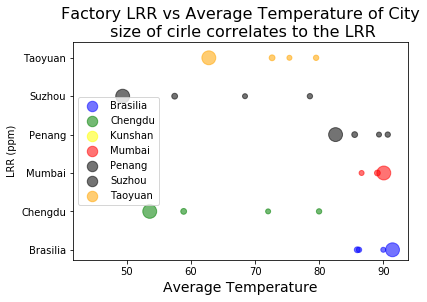

In [107]:
brasilia_weather = LRR_factory[LRR_factory["FACTORY"]=="Brasilia"]
brasilia_weather = brasilia_weather.copy()
brasilia_weather["AVG TEMPS"] = brasilia_avg_temps
brasilia_weather = brasilia_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

chengdu_weather = LRR_factory[LRR_factory["FACTORY"]=="Chengdu"]
chengdu_weather = chengdu_weather.copy()
chengdu_weather["AVG TEMPS"] = chengdu_avg_temps
chengdu_weather = chengdu_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

kunshan_weather =  LRR_factory[LRR_factory["FACTORY"]=="Kushan"]
kunshan_weather = kunshan_weather.copy()
kunshan_weather["AVG TEMPS"] = kunshan_avg_temps
kunshan_weather = kunshan_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

mumbai_weather =  LRR_factory[LRR_factory["FACTORY"]=="Mumbai"]
mumbai_weather = mumbai_weather.copy()
mumbai_weather["AVG TEMPS"] = mumbai_avg_temps
mumbai_weather = mumbai_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

penang_weather =  LRR_factory[LRR_factory["FACTORY"]=="Penang"]
penang_weather = penang_weather.copy()
penang_weather["AVG TEMPS"] = penang_avg_temps
penang_weather = penang_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

suzhou_weather =  LRR_factory[LRR_factory["FACTORY"]=="Suzhou"]
suzhou_weather = suzhou_weather.copy()
suzhou_weather["AVG TEMPS"] = suzhou_avg_temps
suzhou_weather = suzhou_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]

taoyuan_weather =  LRR_factory[LRR_factory["FACTORY"]=="Taoyuan"]
taoyuan_weather = taoyuan_weather.copy()
taoyuan_weather["AVG TEMPS"] = taoyuan_avg_temps
taoyuan_weather = taoyuan_weather[["FACTORY","AVG TEMPS","CONSUMPTION","LR","VID","CND","PID","LRR (ppm)"]]
size = sum_fac_supp["LRR (ppm)"]*6
plt.scatter(brasilia_weather["AVG TEMPS"],brasilia_weather["FACTORY"],alpha = .55, s = size, c = "blue");
plt.scatter(chengdu_weather["AVG TEMPS"],chengdu_weather["FACTORY"],alpha = .55, s = size, c = "green");
plt.scatter(kunshan_weather["AVG TEMPS"],kunshan_weather["FACTORY"],alpha = .55, s = size, c = "yellow");
plt.scatter(mumbai_weather["AVG TEMPS"],mumbai_weather["FACTORY"],alpha = .55, s = size, c = "red");
plt.scatter(penang_weather["AVG TEMPS"],penang_weather["FACTORY"],alpha = .55, s = size, c = "black");
plt.scatter(suzhou_weather["AVG TEMPS"],suzhou_weather["FACTORY"],alpha = .55, s = size, c = "black")
plt.scatter(taoyuan_weather["AVG TEMPS"],taoyuan_weather["FACTORY"],alpha = .55, s = size, c = "orange");

plt.legend(LRR_factory["FACTORY"].unique());
plt.title("Factory LRR vs Average Temperature of City\n size of cirle correlates to the LRR", fontsize = 16);
plt.xlabel("Average Temperature", fontsize = 14);
plt.ylabel("LRR (ppm)");

plt.savefig("AVGtempsVsFactoryLRR.png")